In [2]:
from os.path import join
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import h5py
try:
    import GSHEWaveform
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import GSHEWaveform
import utils
from glob import glob
%load_ext autoreload
%autoreload 2

import astropy.units as u
import astropy.constants as c

def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        if int(base)==1:
            return r"10^{{{0}}}".format(int(exponent))
        if int(base)==-1:
            return r"-10^{{{0}}}".format(int(exponent))
        else:
            return r"{0} \cdot 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str

In [3]:
%matplotlib inline

## $\beta/M$ plots

$\lambda_{\rm eff}$ in meters

**WHAT DOES p5 MEAN, WHY DOES IT GIVE STRANGE PARAMETERS!**

In [4]:
loaddir = "/Users/stiskalek/Data/gshe_liv_alpha0/"

loaddir = '/home/miguel/code/notebooks/gw_data/liv_alpha0/'#compiled by Richard
#loaddir = '/home/miguel/code/notebooks/gw_data/liv/' #full O3b data
#loaddir = '/home/miguel/Dropbox/Projects/AGN_strong_field_lensing_birefringence/liv_alpha0/'

files, names_all = utils.get_liv_fnames(loaddir)
print(files)
#files[has('plus')]

['liv_S200224ca_Aplus_alpha0.h5', 'liv_S190814bv_Aminus_alpha0.h5', 'liv_S190814bv_Aplus_alpha0.h5', 'liv_S191216ap_Aminus_alpha0.h5', 'liv_S200219ac_Aplus_alpha0.h5', 'liv_S190828l_Aplus_alpha0.h5', 'liv_S190924h_Aplus_alpha0.h5', 'liv_S200129m_Aminus_alpha0.h5', 'liv_S190828l_Aminus_alpha0.h5', 'liv_S200129m_Aplus_alpha0.h5', 'liv_S200208q_Aminus_alpha0.h5', 'liv_S200202ac_Aminus_alpha0.h5', 'liv_S191204r_Aplus_alpha0.h5', 'liv_S200311bg_Aminus_alpha0.h5', 'liv_S200202ac_Aplus_alpha0.h5', 'liv_S190727h_Aminus_alpha0.h5', 'liv_S200225q_Aminus_alpha0.h5', 'liv_S190915ak_Aplus_alpha0.h5', 'liv_S190910s_Aminus_alpha0.h5', 'liv_S200219ac_Aminus_alpha0.h5', 'liv_S191215w_Aminus_alpha0.h5', 'liv_S200224ca_Aminus_alpha0.h5', 'liv_S191215w_Aplus_alpha0.h5', 'liv_S200208q_Aplus_alpha0.h5', 'liv_S190707q_Aminus_alpha0.h5', 'liv_S191129u_Aplus_alpha0.h5', 'liv_S190707q_Aplus_alpha0.h5', 'liv_S190828j_Aplus_alpha0.h5', 'liv_S200311bg_Aplus_alpha0.h5', 'liv_S191222n_Aplus_alpha0.h5', 'liv_S191129u

In [5]:
d = h5py.File(loaddir+'liv_S200224ca_Aplus_alpha0.h5','r')
print(d.keys())
print(d['liv_S200224ca_Aplus_dalpha0'].keys())
print(d['liv_S200224ca_Aplus_dalpha0']['config_file'].keys())

<KeysViewHDF5 ['history', 'liv_S200224ca_Aplus_dalpha0', 'version']>
<KeysViewHDF5 ['approximant', 'calibration_envelope', 'config_file', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']>
<KeysViewHDF5 ['analysis', 'bayeswave', 'condor', 'data', 'datafind', 'engine', 'input', 'lalinference', 'ligo-skymap-from-samples', 'ligo-skymap-plot', 'mpi', 'paths', 'ppanalysis', 'resultspage', 'singularity', 'skyarea', 'statevector']>


In [6]:
print(d['liv_S200224ca_Aplus_dalpha0']['config_file'].keys())
s = np.copy(d['liv_S200224ca_Aplus_dalpha0']['posterior_samples'])

s['luminosity_distance']*10**s["log10lambda_eff"]

<KeysViewHDF5 ['analysis', 'bayeswave', 'condor', 'data', 'datafind', 'engine', 'input', 'lalinference', 'ligo-skymap-from-samples', 'ligo-skymap-plot', 'mpi', 'paths', 'ppanalysis', 'resultspage', 'singularity', 'skyarea', 'statevector']>


array([2.08606353e+23, 6.35665880e+19, 6.89743962e+22, ...,
       2.84635854e+20, 4.31100347e+28, 5.49906180e+26])

Text(0.5, 1.0, 'who would do this to their data?')

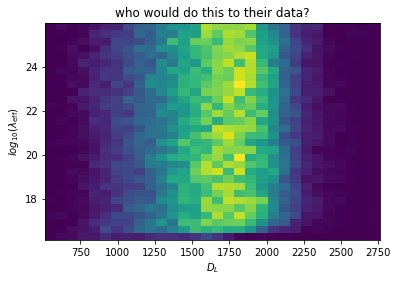

In [7]:
plt.hist2d(s['luminosity_distance'],s['log10lambda_eff'],[30,30])
plt.xlabel(r'$D_L$')
plt.ylabel(r'$log_{10}(\lambda_{\rm eff})$')
plt.title('who would do this to their data?')

In [8]:
l_eff = 10**s['log10lambda_eff']
l_eff_typical = np.quantile(l_eff,0.05)*u.m
DL_typical = np.median(s["luminosity_distance"])*u.Mpc
A0_typical = ((c.h*c.c/(l_eff_typical)).to(u.eV))**2
A0_typical

<Quantity 1.95663299e-46 eV2>

In [9]:
#beta_4 = (1e4GM_sun) A0 D_L

def beta_from_chains(samples, M=1e4):
    ''' return posteriors for beta
        s -> chains
        M -> central BH mass
    '''

    A0 = GSHEWaveform.A0_from_sample(
            10**samples["log10lambda_eff"], samples["redshift"],
            samples["luminosity_distance"])*(u.peV/(c.c*c.h))**2
    return (M*samples['luminosity_distance']*u.Mpc*A0*(c.G*u.Msun/c.c**2)).decompose()

beta_4 = beta_from_chains(s)
np.quantile(beta_4,0.9)

<Quantity 0.0160496>

In [10]:
print('beta /GM')
((A0_typical*(DL_typical)/c.c**1/c.h**2)).decompose()

beta /GM


<Quantity 1.96542357 1 / s>

In [11]:
print('beta max (M/1e4 Msun)')
(1e4*A0_typical*(DL_typical)/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()

beta max (M/1e4 Msun)


<Quantity 0.09680676>

In [12]:
print('beta/GM max (dimensionless)')
((A0_typical*(DL_typical))*c.G/c.c**6).decompose()

beta/GM max (dimensionless)


<Quantity 2.37832076e-119 kg m2>

In [13]:
((c.h*c.c/(l_eff_typical*u.m))/u.eV).decompose()

<Quantity 1.39879698e-23 1 / m>

In [14]:
#combine plots
d_both = [h5py.File(loaddir+'liv_S190814bv_A'+x+'_alpha0.h5','r') for x in ['minus','plus']]

sm, sp = [np.copy(d_both[i]['A'+s+'_alpha0']['posterior_samples']) for i,s in enumerate(['min','plus'])]

bt4_m, bt4_p = -beta_from_chains(sm), beta_from_chains(sp)

# #extract the extrema
# limit = 0.
# low = np.quantile(bt4_m,limit)
# hi = np.quantile(bt4_p,1-limit)
#bt4 = np.concatenate((bt4_m[bt4_m>low],bt4_p[bt4_p<hi]))
bt4 = np.concatenate((bt4_m,bt4_p))
bt4[0]

<Quantity -7.65760383e-09>

In [15]:
np.quantile(bt4,[.05,.95])
#plt.hist(np.abs(bt4_m),bt4_p)

<Quantity [-0.00728265,  0.03232838]>

In [16]:
import seaborn as sns
from matplotlib import ticker as mticker

In [17]:
bt4.mean(), bt4.std()

(<Quantity -0.02279851>, <Quantity 0.52715033>)

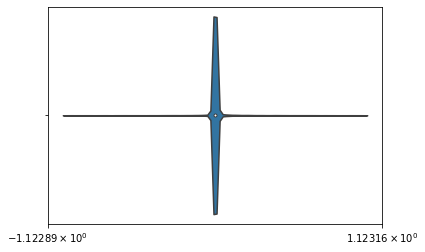

In [18]:
fig, ax = plt.subplots()

bt4_new = bt4[np.abs(bt4)<1]

#low,hi = np.quantile(bt4,[0.05,0.95])
#bt4_new = bt4[np.where(bt4>low and bt4<hi)]

sns.violinplot([bt4_new],showmeans=False, vert=True, showextrema=False,quantiles=[[0.05,.95] for i in [1]],widths=1,s=3,ax=ax)

ax.set_xscale('symlog')
# ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
# ymin, ymax = ax.get_xlim()
# tick_range = np.arange(np.floor(ymin), ymax,10)
# ax.xaxis.set_ticks(tick_range)
# ax.xaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
# plt.tight_layout()
plt.show()

## Violin plots

In [19]:
f = h5py.File(loaddir+'liv_S200311bg_Aplus_alpha0.h5','r+')
s = np.copy(f['liv_S200311bg_Aplus_dalpha0']['posterior_samples'])
s['redshift']

array([0.19464939, 0.20931768, 0.17172329, ..., 0.16414492, 0.14671858,
       0.12706612])

In [20]:
#importlib.reload(utils)

beta_over_M_raw = []

names = []
file_names = []
for i, file in enumerate(files):
    btOm = utils.beta_over_M_from_liv_samples(join(loaddir, file))
    if btOm is not None:
        beta_over_M_raw.append(btOm)
        names.append(names_all[i])
        file_names.append(file)
    #else:
    #    print(file+' gave none')



sort = np.argsort(names)
names = [names[i] for i in sort]
file_names = [file_names[i] for i in sort]
beta_over_M_raw = [beta_over_M_raw[i] for i in sort]

#print(beta_over_M)

/home/miguel/code/GSHE/scripts/utils.py:50: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filename)


/home/miguel/code/notebooks/gw_data/liv_alpha0/liv_S190828l_Aplus_alpha0.h5 not found
/home/miguel/code/notebooks/gw_data/liv_alpha0/liv_S190828l_Aminus_alpha0.h5 not found
/home/miguel/code/notebooks/gw_data/liv_alpha0/liv_S200202ac_Aminus_alpha0.h5 not found
/home/miguel/code/notebooks/gw_data/liv_alpha0/liv_S200202ac_Aplus_alpha0.h5 not found


In [21]:
print(files)
print(len(files))
print(len(file_names))

['liv_S200224ca_Aplus_alpha0.h5', 'liv_S190814bv_Aminus_alpha0.h5', 'liv_S190814bv_Aplus_alpha0.h5', 'liv_S191216ap_Aminus_alpha0.h5', 'liv_S200219ac_Aplus_alpha0.h5', 'liv_S190828l_Aplus_alpha0.h5', 'liv_S190924h_Aplus_alpha0.h5', 'liv_S200129m_Aminus_alpha0.h5', 'liv_S190828l_Aminus_alpha0.h5', 'liv_S200129m_Aplus_alpha0.h5', 'liv_S200208q_Aminus_alpha0.h5', 'liv_S200202ac_Aminus_alpha0.h5', 'liv_S191204r_Aplus_alpha0.h5', 'liv_S200311bg_Aminus_alpha0.h5', 'liv_S200202ac_Aplus_alpha0.h5', 'liv_S190727h_Aminus_alpha0.h5', 'liv_S200225q_Aminus_alpha0.h5', 'liv_S190915ak_Aplus_alpha0.h5', 'liv_S190910s_Aminus_alpha0.h5', 'liv_S200219ac_Aminus_alpha0.h5', 'liv_S191215w_Aminus_alpha0.h5', 'liv_S200224ca_Aminus_alpha0.h5', 'liv_S191215w_Aplus_alpha0.h5', 'liv_S200208q_Aplus_alpha0.h5', 'liv_S190707q_Aminus_alpha0.h5', 'liv_S191129u_Aplus_alpha0.h5', 'liv_S190707q_Aplus_alpha0.h5', 'liv_S190828j_Aplus_alpha0.h5', 'liv_S200311bg_Aplus_alpha0.h5', 'liv_S191222n_Aplus_alpha0.h5', 'liv_S191129u

In [188]:
#print(beta_over_M)
from astropy import units as u
from astropy import constants as c
(u.Mpc*u.peV**2).decompose()

Unit("7.92084e-40 kg2 m5 / s4")

**Notes:**
* 90% and 95\% quantiles are very different!

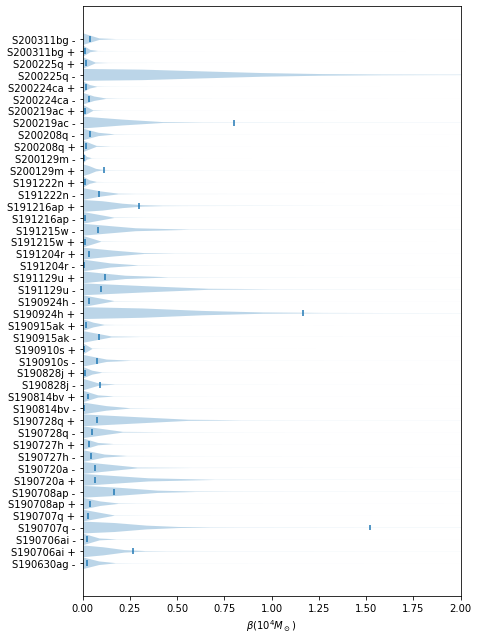

In [221]:
plt.figure(figsize=(9 * 0.75, 9))

#Coefficient from our long paper, eq 4.5
#assumes: luminosity_distance in Mpc, A0 = our c0 and is in ev^2
#NOTE: A0 in peV^2 to eV^2 
#beta_over_M = [bt*(1e-12)**2/(1e-23)**2/1e3*0.148/(5e4) for bt in beta_over_M_raw]

factor = (u.peV**2*u.Mpc/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()

beta_1Msun = [bt*float(factor) for bt in beta_over_M_raw]

colors = ['b' if 'plus' in f else 'r' for f in file_names]
sign = ['+' if 'plus' in f else '-' for f in file_names]

scale = 1e4
#beta_p = [b for]

plt.violinplot(np.abs(beta_1Msun)*scale, showmeans=False, vert=False, showextrema=False, widths=1,quantiles=[[.9] for b in beta_1Msun])#,color=colors)
yticks = np.arange(1, len(names) + 1)
plt.yticks(yticks, [nam+' '+sign[i] for i,nam in enumerate(names)])
plt.xlim(0, 2e-4*scale)
#plt.xscale('log')

plt.xlabel(r"$\beta(10^4 M_\odot)$")
plt.tight_layout()
#plt.savefig("/Users/stiskalek/Downloads/A0s.png", dpi=450)
plt.show()

In [190]:
iplus = [i for i in range(len(file_names)) if 'plus' in file_names[i]]

beta_1Msun[iplus]

TypeError: list indices must be integers or slices, not list

In [191]:
factor = (u.peV**2*u.Mpc/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()

beta_1Msun = np.array([bt*float(factor) for bt in beta_over_M_raw])
#list to hold the data
data = []

#loop over the elements of the "beta_1Msun" list
for i, beta in enumerate(beta_1Msun):
    #extract the event name, sign and alpha from the file name
    event, sign, alpha = file_names[i].split("_")[1:4]
    alpha = (alpha[:-3])
    #create the full file name
    file = f'liv_{event}_{sign}_{alpha}.h5'
    #read the data from the file
    #df = pd.read_hdf(file)
    #add a new column to the dataframe with the event name, sign and alpha
    df = {}
    df['data'] = beta
    df['event'] = event
    df['sign'] = sign
    df['alpha'] = alpha
    #append the dataframe to the list
    data.append(df)



data_2 = {}

for d in data:
    event = d['event']
    sign = d['sign']
    s = +1 if 'plus' in sign else -1
    
    if event in data_2.keys() and len(d['data'])>0:
        data_2[event] = np.concatenate((d['data'],s*data_2[event]))
    else:
        data_2[event] = s*d['data']

In [212]:
5e4*np.quantile(data_2['S200311bg'],[0.05,0.95])

array([-0.04117787,  0.25584038])

**Some questions**
* Where do we find the full name?
* This is only a portion of events, table I of the GWTC-2 TGR paper shows 23 events with LIV tests!

In [202]:
keys
data_2.keys(), keys

(dict_keys(['S190630ag', 'S190706ai', 'S190707q', 'S190708ap', 'S190720a', 'S190727h', 'S190728q', 'S190814bv', 'S190828j', 'S190910s', 'S190915ak', 'S190924h', 'S191129u', 'S191204r', 'S191215w', 'S191216ap', 'S191222n', 'S200129m', 'S200208q', 'S200219ac', 'S200224ca', 'S200225q', 'S200311bg']),
 dict_keys(['S190630ag', 'S190706ai', 'S190707q', 'S190708ap', 'S190720a', 'S190727h', 'S190728q', 'S190814bv', 'S190828j', 'S190910s', 'S190915ak', 'S190924h', 'S191129u', 'S191204r', 'S191215w', 'S191216ap', 'S191222n', 'S200129m', 'S200208q', 'S200219ac', 'S200224ca', 'S200225q', 'S200311bg']))

**Interpretation**

Our bounds are $\beta/M < x/M_\odot \equiv X$. Then we quote $\beta < 5 \cdot 10^4 X (M/5\cdot 10^4 M_\odot)$

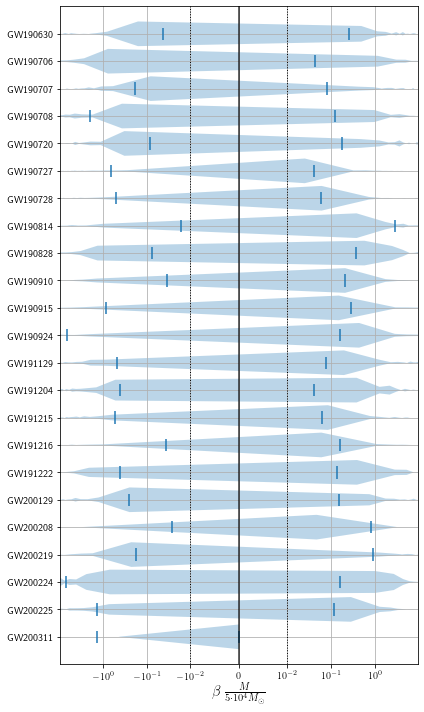

In [371]:
fig, axes=plt.subplots(figsize=(6, 10))


keys = data_2.keys()

#keys = [k for k in keys if k!= 'S200311bg'] #remove this event, where the negative values are tiny (looks like the p5 events?)

ticks = np.arange(len(keys))

scale = 5e4

this_data = [data_2[k]*scale for k in keys]
quantiles=len(this_data)*[[0.05,0.95]]

violin_parts=axes.violinplot(this_data, ticks, vert=False, showmedians=False, widths=0.9, showextrema=False, quantiles=quantiles, bw_method=1e-3) #bw_method = np.log10(this_data)

axes.axvline(0,color='k',alpha=0.8)
axes.set_yticks(ticks)
axes.set_ylim(-1,ticks[-1]+1)

labels = ['GW'+k[1:7] for k in keys]

axes.set_yticklabels(np.flip(labels))
axes.set_xlabel(r'$\beta \, \frac{M}{5\cdot 10^4 M_\odot}$',fontsize=15)
axes.set_xscale('symlog',linthreshx=0.01)
axes.grid(which='both')
axes.set_xlim(-9.5,9.5)
for x in [-1e-2,1e-2]: axes.axvline(x,c='k',lw=1,ls=':')

fig.tight_layout()
if True:
    plt.savefig('GWTC3_beta_violin.png')
    plt.savefig('GWTC3_beta_violin.pdf',bbox_inches='tight')

In [354]:
len(this_data[-1])

74639

ValueError: zero-size array to reduction operation minimum which has no identity

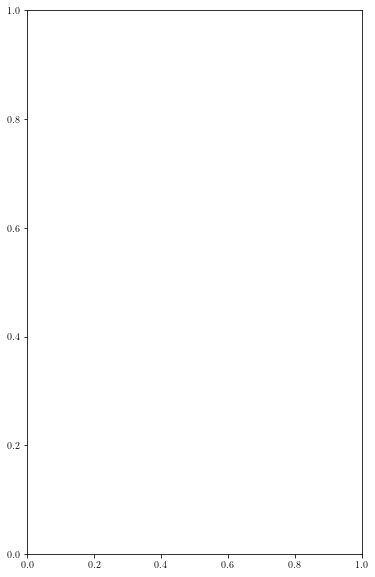

In [366]:
fig, axes=plt.subplots(figsize=(6, 10))
violin_parts=axes.violinplot(this_data[-1:-2], ticks[-1:-2],vert=False,showmedians=False,widths=0.9,showextrema=False, bw_method=1e-3)

<Figure size 162x2592 with 0 Axes>

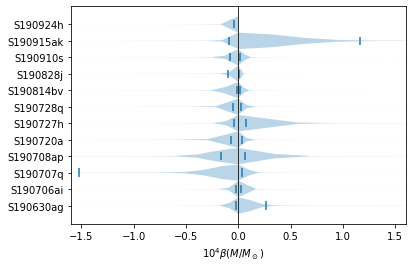

In [38]:
plt.figure(figsize=(3 * 0.75, 3*12))

fig,ax = plt.subplots(1,2,sharey=True)
plt.subplots_adjust(wspace=0.0)

#Coefficient from our long paper, eq 4.5
#assumes: luminosity_distance in Mpc, A0 = our c0 and is in ev^2
#NOTE: A0 in peV^2 to eV^2 
#beta_over_M = [bt*(1e-12)**2/(1e-23)**2/1e3*0.148/(5e4) for bt in beta_over_M_raw]

factor = (u.peV**2*u.Mpc/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()

beta_1Msun = np.array([bt*float(factor) for bt in beta_over_M_raw])

names = np.array(names)

colors = ['b' if 'plus' in f else 'r' for f in file_names]

#axis =  [1 if 'plus' in f else 0 for f in file_names]

iplus = [i for i in range(len(file_names)) if 'plus' in file_names[i]]
iminus = [i for i in range(len(file_names)) if 'minus' in file_names[i]]

sign = ['+' if 'plus' in f else '-' for f in file_names]

scale = 1e4
#beta_p = [b for]


ax[0].violinplot(-np.abs(beta_1Msun[iminus])*scale, showmeans=False, vert=False, showextrema=False, widths=1,quantiles=[[.1] for b in beta_1Msun[iminus]])#,color=colors)

ax[1].violinplot(np.abs(beta_1Msun[iplus])*scale, showmeans=False, vert=False, showextrema=False, widths=1,quantiles=[[.9] for b in beta_1Msun[iplus]])#,color=colors)

yticks = np.arange(1, len(names[iminus]) + 1)
plt.yticks(yticks, [nam for i,nam in enumerate(names[iminus])])
ax[1].axes.yaxis.set_visible(False)
ax[0].set_xlim(-1.6e-4*scale,0)
ax[1].set_xlim(1e-5, 1.6e-4*scale)
#plt.xscplusale('symlog')


fig.text(0.5,0.01,r"$10^4\beta(M/M_\odot)$",ha='center')
#plt.tight_layout()
# ax[0].annotate('PRELIMINARY',(-1.4,8),rotation=50,fontsize=14,color='r')
if True:
    plt.savefig('GWTC3_constraints.png')
    plt.savefig('GWTC3_constraints.pdf',bbox_inches='tight')
# plt.show()

([<matplotlib.axis.YTick at 0x7f12b3597a90>,
 [Text(0, 0, 'S190630ag'),
  Text(0, 0, 'S190706ai'),
  Text(0, 0, 'S190707q'),
  Text(0, 0, 'S190708ap'),
  Text(0, 0, 'S190720a'),
  Text(0, 0, 'S190727h'),
  Text(0, 0, 'S190728q'),
  Text(0, 0, 'S190814bv'),
  Text(0, 0, 'S190828j'),
  Text(0, 0, 'S190910s'),
  Text(0, 0, 'S190915ak'),
  Text(0, 0, 'S190924h')])

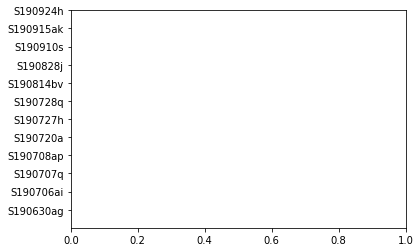

In [23]:
yticks = np.arange(1, len(names[iminus]) + 1)
plt.yticks(yticks, [nam for i,nam in enumerate(names[iminus])])

In [1]:
bt90 = np.array([np.percentile(bt,90) for bt in beta_1Msun])

NameError: name 'np' is not defined

## Constraints

For a given event, the probaility of detecting GSHE is given by

$$p_i= f(M,r_{\rm src}) P_{\rm GSHE}(\beta_{\rm ex}^{i}(M),r_{\rm src}) $$

$f$ is the fraction of mergers at a given radius of a BH of a given mass. The second factor is the probability of detecting GSHE, which we take as given by $\frac{1}{2}\Upsilon(\beta_{\rm ex}^i(M),r_{\rm src})$, where $\beta_{\rm ex}^i(M)$ is the maximum allowed value of $\beta$ given by the data (coefficient reflects that $\Upsilon$ only counts the half sphere).

**NOTES**
* $\checkmark$ parameterize $\Upsilon \propto \beta_{\rm min}^{-2/3}$ for $\beta<1$
* Include measurement uncertainty in $\beta$ $\to$ integrate against (cumulative) posterior?
* need to consider positive and negative beta
* could integrate up to a certain radius of the source (i.e. fraction of events for $r<XX$)
 

The probability of non-detection should be $\prod_i (1-p_i)$, generalized to $P(U,D,\vec p)=\prod_u(1-p_u)\prod_d p_d$ for $D$ detected events and $U$ undetected ones. When $p_i\ll 1 \Rightarrow (1-p_i)\approx e^{-p_i}$ and we recover a Poisson distribution.

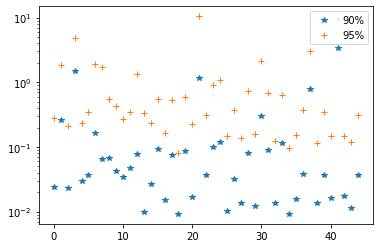

In [222]:
bt90 = np.array([np.percentile(bt,90) for bt in beta_1Msun])
bt95 = np.array([np.percentile(bt,95) for bt in beta_1Msun])

plt.semilogy(bt90*1e4,'*',label='90%')
plt.semilogy(bt95*1e4,'+',label='95%')

plt.legend()

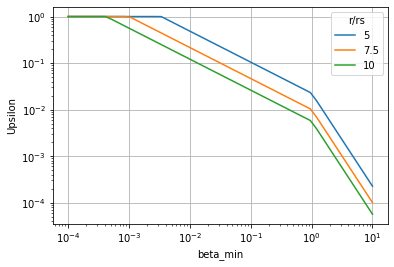

In [223]:
def Upsilon(bt_min,r_src,n0=-2/3.,n1=-2,bt_cut = np.infty):
    '''fraction of events with bt>bt_min
        r_src = distance in r_s
        approximated by min(1,A*bt_min^n0) (for bt_min <1)
                            A*bt_min^n1 (bt_min>1)
                        0 for bt_min>bt_cut ->TODO: replace by B_bt_min^-n1
                        
        TODO: coefficient computed by hand noticing that Upsilon(bt=1,r=7.5) = 1e-2
    '''
    A = 1e-2 #amplitude at bt_min = 1, r=7.5
    Ups = np.where(bt_min<1,A*(bt_min/1)**n0, A*(bt_min/1)**n1)*(7.5/r_src)**2
    Ups[Ups>=1] = 1
    Ups[bt_min>bt_cut] = 0
    
    return Ups

vUpsilon = np.vectorize(Upsilon)

bt_min = np.geomspace(1e-4,1e1)
for  rs in [5,7.5,10]:
    plt.loglog(bt_min,Upsilon(bt_min,rs,bt_cut=10),label=rs)
    
plt.legend(title='r/rs')
plt.xlabel('beta_min')
plt.ylabel('Upsilon')
plt.grid()

In [224]:
def P_undetected(bt_max,f,M,r_src):
    '''probability of non-detection, multiplying individual calculations
       bt_max = limit to observations, for 1 solar mass
       M = mass [Msun]
       r = source radius [rs]
       f = fraction of events
    '''
    ups = Upsilon(bt_max*M, r_src)
    pi = (1-0.5*ups*f) #TODO: extend upsilon to total probability
    Ptot = np.prod(pi)#np.exp(np.sum(np.log(pi)))
    return Ptot

vP_undetected = np.vectorize(P_undetected)

def rate_poisson(bt_max,M,r_src, bt_cut=np.infty):
    '''
       returns \sum_i 0.5 Upsilon(bt_max*M, r_src) = f^-1 log(L_poisson)
       poisson approximation for the probability (useful to solve for f)
    '''
    ups = Upsilon(bt_max*M, r_src,bt_cut=bt_cut)
    return 0.5*np.sum(ups)

v_rate_poisson=np.vectorize(rate_poisson)

In [225]:
M,r=1e6,5
rate_90 = np.abs(np.log(0.1))
f = rate_90/rate_poisson(bt90,M,r)
print(f), print(len(bt90))

19.60674600820456
45


(None, None)

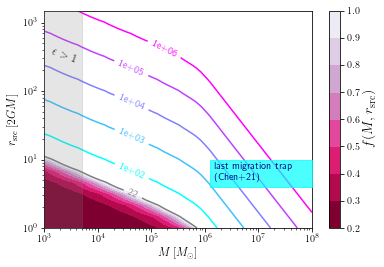

In [331]:
Masses = np.logspace(3,8,30)
radii = np.geomspace(1,1.5e3,20)

import matplotlib.colors as colors

X,Y = np.meshgrid(Masses,radii)

#Factor 0.5 bc of double counting!
Z = np.array([[2*rate_90/rate_poisson(bt90,M,r,bt_cut=np.infty) for M in Masses] for r in radii])

contour= plt.contourf(X,Y,Z,np.linspace(0.2,1,9), #norm=colors.LogNorm(),
                      cmap='PuRd_r')#,cmap='inferno_r')
c2 = plt.contour(X,Y,Z,[1],colors='gray')
#plt.colorbar(c,label=r'$f$ (explain size sample)')

cbar = plt.colorbar(contour)# (explain size sample)')


future = np.logspace(2,6,5)
c3= plt.contour(X,Y,Z*22,future, norm=colors.LogNorm(),
                      cmap='cool')




cbar.set_label(r'$f(M,r_{\rm src})$', fontsize=14)

plt.xscale('log')
#plt.yscale('symlog',linthreshy=10)
plt.yscale('log')
plt.xlabel(r'$M \, [M_\odot]$',fontsize=12)
plt.ylabel(r'$r_{\rm src} \, [2GM]$',fontsize=12)

labs = [latex_float(f) for f in future]
#plt.rc('text', usetex=True)


plt.fill_betweenx(radii,1e3,5e3,color='gray',alpha=0.2,zorder=10)

plt.fill_between(Masses[Masses>1e6],4,10,color='cyan',alpha=0.7,zorder=10)
plt.annotate(' last migration trap \n (Chen+21)',(1.5e6,5.),color='navy',zorder=11)

plt.annotate(r'$\epsilon>1$',(1.3e3,250),rotation=-20,fontsize=12,color='black')

# fmt = {}
# strs = [r'$10^2$',r'$10^3$',r'$10^4$',r'$10^5$',r'$10^6$']
# for l, s in zip(c3.levels, strs):
#     fmt[l] = s

plt.clabel(c3,c3.levels,inline=True,fmt='%.0e',use_clabeltext=True)

fmt = {}
strs = ['22']
for l, s in zip(c2.levels, strs):
    fmt[l] = s

plt.clabel(c2,c2.levels,inline=True,fmt=fmt,use_clabeltext=True)


plt.savefig('prospective_constraints_2.png')
plt.savefig('prospective_constraints_2.pdf',bbox_inches='tight')

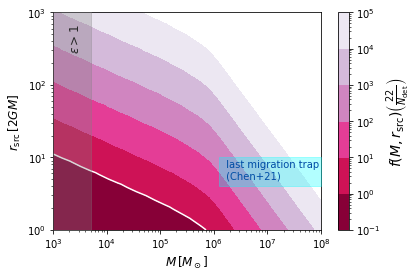

In [259]:
Masses = np.logspace(3,8,30)
radii = np.geomspace(1,1e3,20)

import matplotlib.colors as colors

X,Y = np.meshgrid(Masses,radii)

#Factor 0.5 bc of double counting!
Z = np.array([[2*rate_90/rate_poisson(bt90,M,r,bt_cut=np.infty) for M in Masses] for r in radii])

contour= plt.contourf(X,Y,Z,np.logspace(-1,5,7), norm=colors.LogNorm(),cmap='PuRd_r')#,cmap='inferno_r')
contour2 = plt.contour(X,Y,Z,[1],colors='w')
#plt.colorbar(c,label=r'$f$ (explain size sample)')

cbar = plt.colorbar(contour)# (explain size sample)')

cbar.set_label(r'$f(M,r_{\rm src}) \left(\frac{22}{N_{\rm det}}\right)$', fontsize=14)

plt.xscale('log')
#plt.yscale('symlog',linthreshy=10)
plt.yscale('log')
plt.xlabel(r'$M \, [M_\odot]$',fontsize=12)
plt.ylabel(r'$r_{\rm src} \, [2GM]$',fontsize=12)
#plt.title('Poission approximation!')
# plt.annotate('PRELIMINARY',(3e6,60),rotation=-50,fontsize=14,color='r')
plt.fill_betweenx(radii,1e3,5e3,color='gray',alpha=0.3,zorder=10)

plt.fill_between(Masses[Masses>1e6],4,10,color='cyan',alpha=0.3,zorder=10)
plt.annotate(' last migration trap \n (Chen+21)',(1.5e6,5.),color='navy')

plt.annotate(r'$\epsilon>1$',(2e3,300),rotation=90,fontsize=12,color='black')
plt.savefig('prospective_constraints.png')
plt.savefig('prospective_constraints.pdf',bbox_inches='tight')

Text(0.5, 1.0, 'M=1.0e+04, r=5')

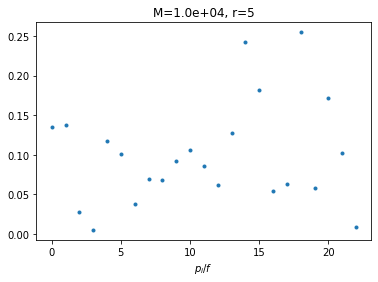

In [34]:
M=1e4
r = 5
ups = Upsilon(bt90*M,r)

#plt.scatter(bt90*M,ups)
plt.plot(0.5*ups,'.')

plt.xlabel(r'$p_i/f$')
plt.title('M=%.1e, r=%g'%(M,r))

#def Rate(bt_limits, M, r_src):
    

Text(0.5, 1.0, 'M=1.00e+04 M_sun (preliminary!)')

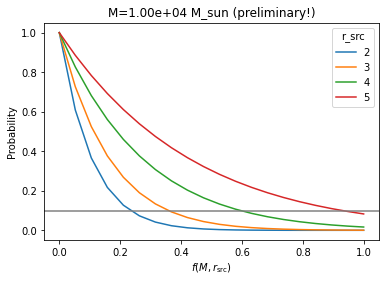

In [35]:
fs = np.linspace(0,1,20)

M=1e4

for r_src in [2,3,4,5]:
#r_src=5

    Ps = np.array([P_undetected(bt90,f,M,r_src) for f in fs])
    plt.plot(fs,Ps,label=r_src)
    
plt.legend(title='r_src')
plt.axhline(0.1,color='gray')
plt.xlabel(r'$f(M,r_{\rm src})$')
plt.ylabel('Probability')
plt.title('M=%.2e M_sun (preliminary!)'%M)

In [36]:
def rate(beta_lim, M, r_src):
    P_vect =  0.5*ups(beta_lim*M,r_src)
    rate = np.

SyntaxError: invalid syntax (<ipython-input-36-5651060e834a>, line 3)

## $A_0$ plots

In [241]:
A0s = []

names = []
file_names =[]
for i, file in enumerate(files):
    A0 = utils.A0_from_liv_samples(join(loaddir, file))
    if A0 is not None:
        A0s.append(A0 * 1e20)
        names.append(names_all[i])
        file_names.append(file)



sort = np.argsort(names)
names = [names[i] for i in sort]
A0s = [A0s[i] for i in sort]
file_names = [file_names[i] for i in sort]

print(A0s)

[array([2.97419674e-18, 1.02519884e-04, 1.80215789e-12, ...,
       5.24229898e-16, 8.16633325e-20, 5.35169212e-09]), array([6.71608998e-25, 9.17855207e-17, 1.89500222e-12, ...,
       2.35947978e-12, 8.88158134e-23, 2.70003255e-16]), array([8.71279935e-14, 2.05850009e-19, 8.18122981e-06, ...,
       8.38579612e-18, 7.57799475e-09, 1.71554687e-18]), array([1.38944188e-18, 4.42015225e-08, 6.28312612e-19, ...,
       2.85237953e-19, 1.04856129e-15, 5.64307359e-14]), array([1.48367233e-11, 9.36446431e-03, 1.64083278e-09, ...,
       1.01819035e-15, 1.82981716e-07, 1.75128325e-03]), array([1.41370110e-15, 1.09133073e-11, 7.98384648e-14, ...,
       1.94034969e+00, 3.71875867e-12, 2.52371738e-05]), array([2.33674798e-24, 1.48343978e-12, 1.90851536e-09, ...,
       5.18517601e-15, 5.57020421e-16, 1.06799092e-25]), array([8.36604267e-11, 2.67521436e-25, 2.75017502e-10, ...,
       4.08569926e-19, 4.40403213e-10, 5.57216512e-18]), array([8.03301510e+00, 4.66288964e-02, 3.90625471e-05, ...,
   

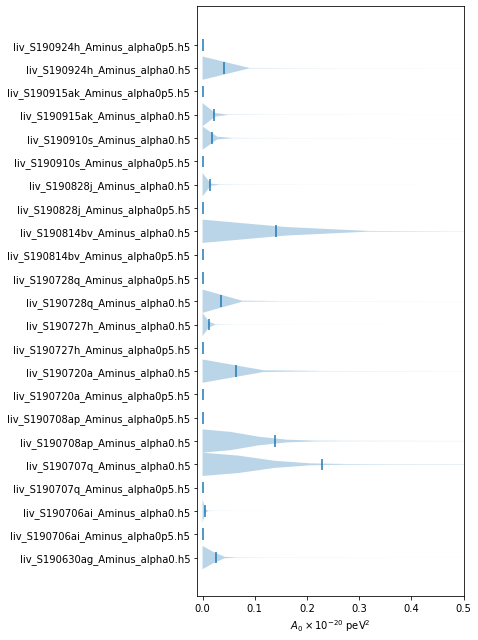

In [242]:
plt.figure(figsize=(9 * 0.75, 9))

plt.violinplot(np.abs(A0s), showmeans=True, vert=False, showextrema=False, widths=1)
yticks = np.arange(1, len(names) + 1)
plt.yticks(yticks, file_names)
plt.xlim(-.01, 0.5)

plt.xlabel(r"$A_0 \times 10^{-20}~\mathrm{peV}^2$")
plt.tight_layout()
#plt.savefig("/Users/stiskalek/Downloads/A0s.png", dpi=450)
plt.show()

In [ ]:
Mpc

In [ ]:
from scipy.constants import e

In [ ]:
1 * e 